In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from IPython.display import display, HTML
from IPython.display import Javascript
from IPython.display import Image

%matplotlib notebook

In [23]:
X, Y = make_classification(
    n_samples = 200,
    n_features = 2,
    n_informative = 2,
    n_redundant = 0,
    n_clusters_per_class = 1,
    class_sep = 1.3,
    random_state = 7
)

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Paired, s=50, edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Binary classification")
plt.show()

<IPython.core.display.Javascript object>

In [25]:
class Perceptron_Anim:
    def __init__(self, eta0=0.01, max_itr=1000):
        self.coef_ = None
        self.intercept_ = None
        self.eta0 = eta0
        self.max_itr = max_itr
        self.m = []
        self.b = []
    
    def fit(self, X_train, Y_train):
        X_train = np.array(X_train)
        Y_train = np.array(Y_train)
        X_train = np.insert(X_train, 0, 1, axis=1)
        n_sample = X_train.shape[0]
        n_feature = X_train.shape[1]
        W = np.ones(n_feature)
        for i in range(self.max_itr):
            rand_i = np.random.randint(0,n_sample)
            Y_pred = self.step_func(np.dot(X_train[rand_i], W))
            W = W + self.eta0 * (Y_train[rand_i] - Y_pred) * X_train[rand_i]
            self.m.append(-(W[1]/W[2]))
            self.b.append(-(W[0]/W[2]))
        self.coef_ = W[1:]
        self.intercept_ = W[0]

    def predict(self, X_test):
        return self.step_func(np.dot(X_test, self.intercept_)) + self.intercept_
    
    @staticmethod
    def step_func(val):
        return 1 if val>=0 else 0

In [26]:
perceptron = Perceptron_Anim(eta0=0.1, max_itr=1000)

In [27]:
perceptron.fit(X, Y)

In [28]:
print("Coefficients: ", perceptron.coef_)
print("Intercepts: ", perceptron.intercept_)

Coefficients:  [ 1.54042824 -0.56720811]
Intercepts:  0.40000000000000013


<IPython.core.display.Javascript object>

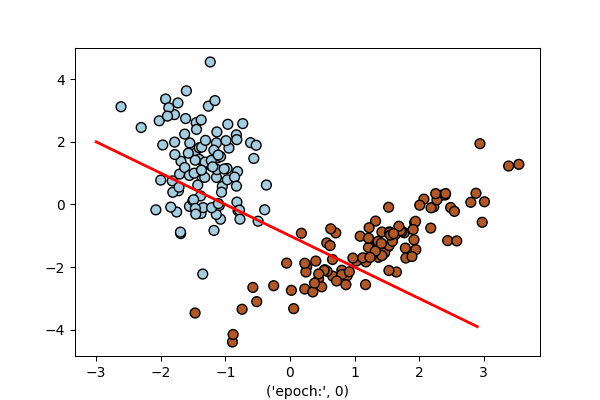

In [29]:
fig, ax = plt.subplots(figsize=(6,4))
x_i = np.arange(-3, 3, 0.1)
y_i = x_i * perceptron.m[0] + perceptron.b[0]
ax.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Paired, s=50, edgecolor='k')
line, = ax.plot(x_i, y_i , 'r-', linewidth=2)
def update_plot(i):
    label = ("epoch:",i)
    line.set_ydata(x_i * perceptron.m[i] + perceptron.b[i])
    ax.set_xlabel(label)
anim = FuncAnimation(fig, update_plot, repeat=True, frames=1000, interval=100)
anim.save("animation.gif", writer="pillow")
Image(filename="animation.gif")